In [1]:
import pi_map
mpr=pi_map.Mapper(mp=True)

reading feather...is complete


In [2]:
st=mpr.states
nhdplus=mpr.NHDPlusV21CatchmentSP

In [13]:
if True:
    import importlib
    Mapper=importlib.reload(pi_map)
    mpr=pi_map.Mapper(mp=False)
    mpr.NHDPlusV21CatchmentSP=nhdplus
    mpr.states=st

In [14]:
spec_list=['lampetra richardsoni','etheostoma nigripinne','etheostoma rufilineatum','catostomus doscobolus']

In [15]:
mpr.plotSpeciesPredict(spec_list[3],estimator_name=None,huc_level=4,include_absent=False,save_check=False,plot_train=False)

building data


In [4]:
mpr.plotSpeciesPredict(spec_list[1],estimator_name=None,huc_level=4,include_absent=False,save_check=False,plot_train=False)

building data
opening /home/dp/hdd/gits/kernelkernel/data_tool/specieshuc8files with length:4 and type:<class 'tuple'>
huc08
plotting...0301, 0316, 0604, 0603, r 0.05577079747642232
mag 0.011154159495284465
lw 1.611559578024279


building data
huc08
plotting...0512, 0513, 0604, 0315, 0601, 0603, 0602, 0505, 0510, r 0.15538615972131942
mag 0.031077231944263886
lw 1.4129198184206373


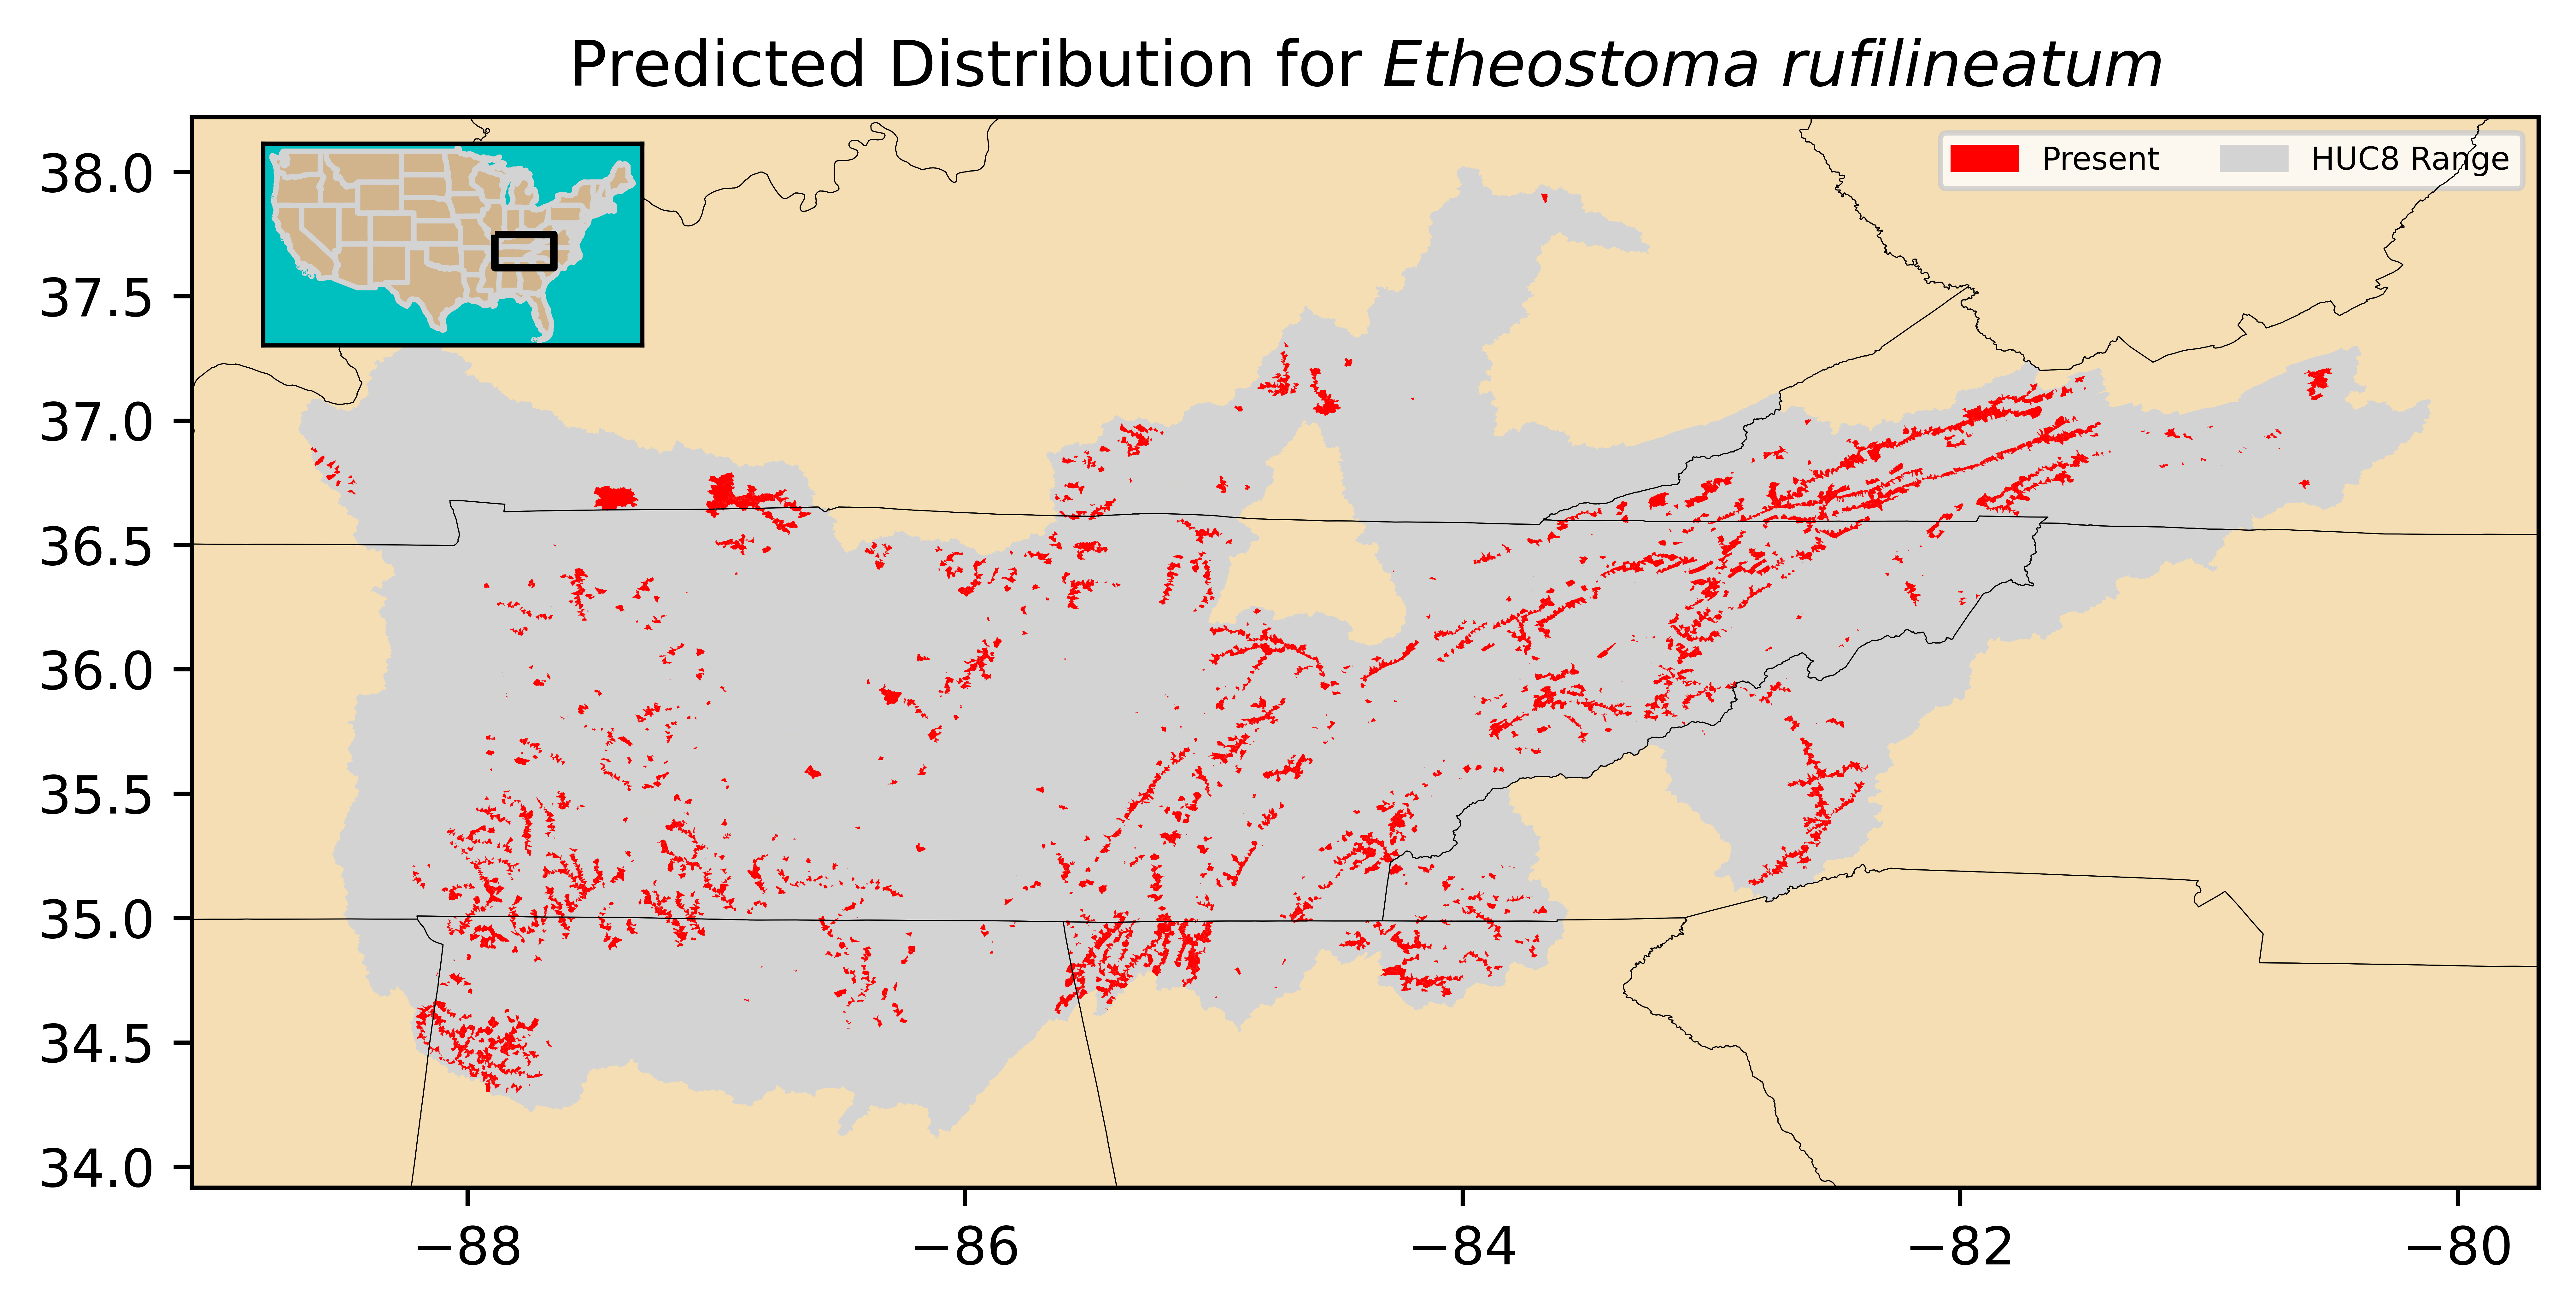

In [5]:
mpr.plotSpeciesPredict(spec_list[2],estimator_name=None,huc_level=4,include_absent=False,save_check=False,plot_train=False)

building data
huc08
plotting...0302, 1709, 1708, 1710, 1703, 1707, 1711, 1801, 1802, 1804, 1805, 1806, 1807, r 0.11952408193845636
mag 0.023904816387691274
lw 1.4699264070367561


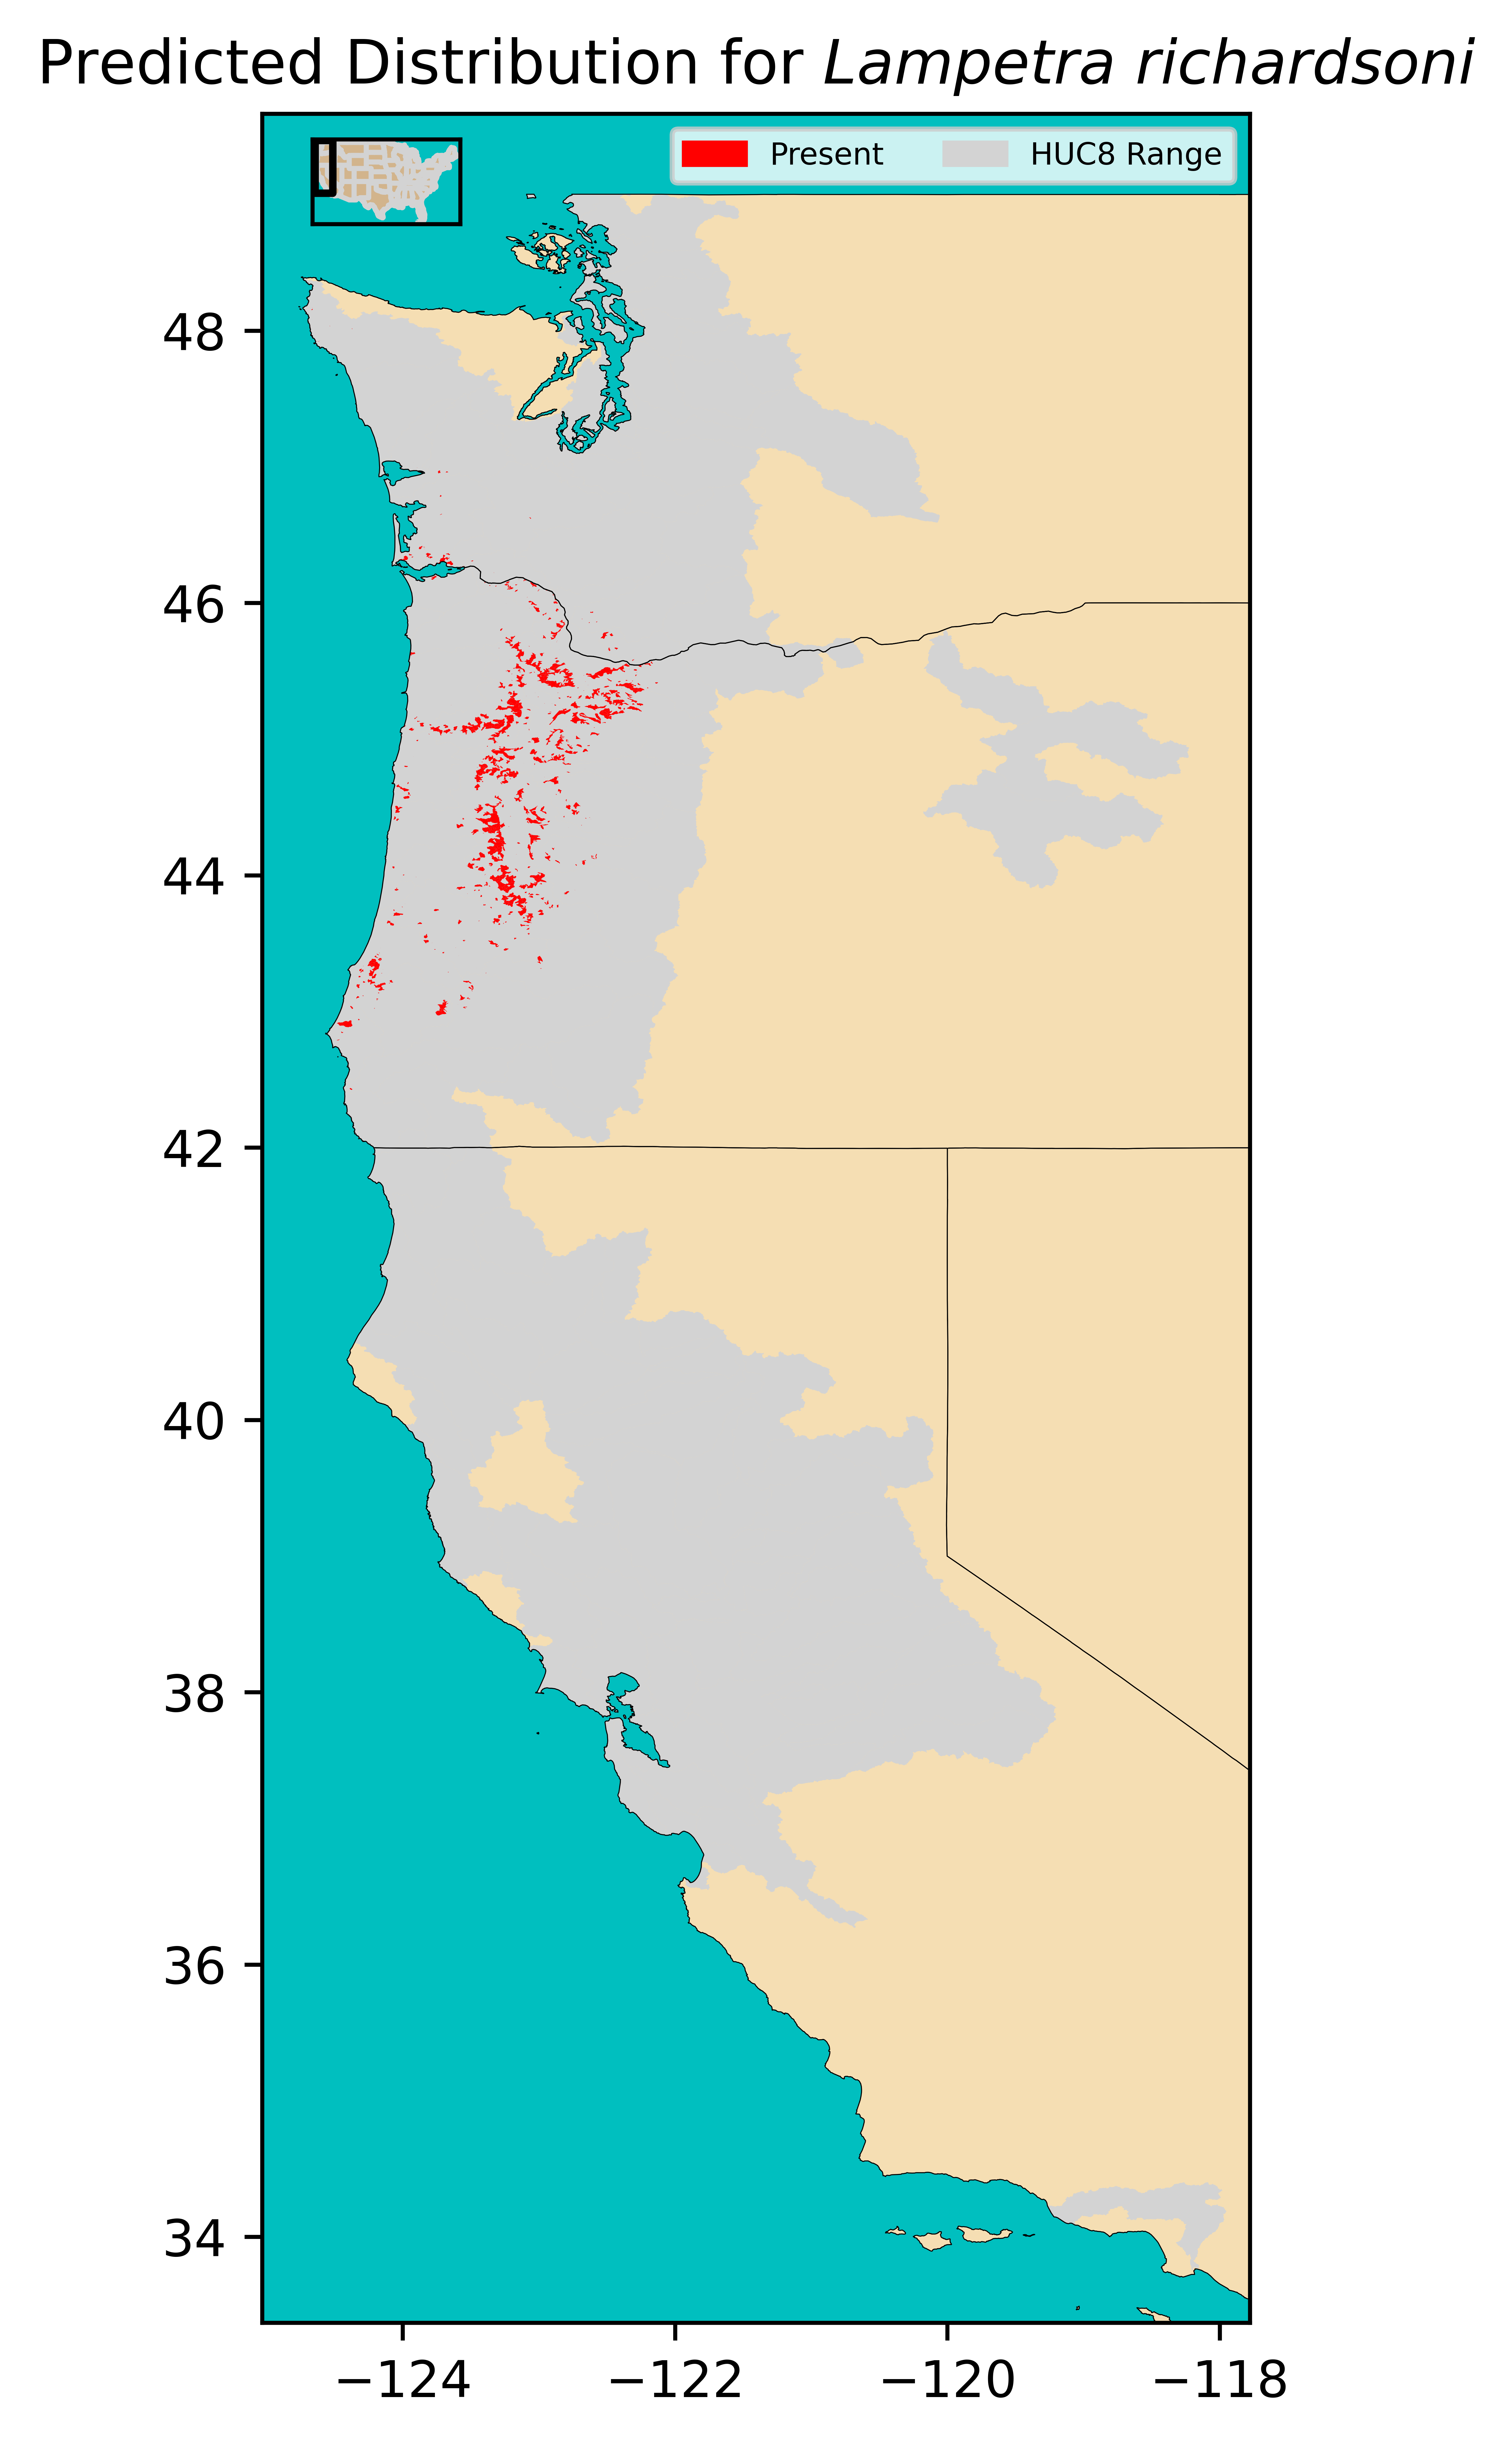

In [6]:
mpr.plotSpeciesPredict(spec_list[0],estimator_name=None,huc_level=4,include_absent=False,save_check=False,plot_train=False)

In [9]:
-

SyntaxError: invalid syntax (476313318.py, line 1)

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
import matplotlib.patches as mpatches
#from matplotlib.collections import PatchCollection
#from matplotlib.patches import Polygon

In [ ]:
from pi_map import Mapper
mpr=Mapper(mp=False)

In [ ]:
mpr.set_states()

In [ ]:
crs=mpr.states.crs

In [ ]:
def findBoxRatio(box1,box2,geo='area'):
    w1=box1[2]-box1[0]
    w2=box2[2]-box2[0]
    h1=box1[3]-box1[1]
    h2=box2[3]-box2[1]
    if geo=='area':return w1*h1/(w2*h2)
    elif geo=='x':return w1**1/w2**1
    elif geo=='y': return h1**1/h2**1
    else: 
        assert False, f"findBoxRatio doesn't recognize geo:{geo}"

In [ ]:
def inset_test(size,size2=None):
    if size2 is None: size2=size
    x_min=-84.70186258
    y_min=33.56296794
    bbox=[x_min,y_min , x_min+size, y_min+size2]
    gdf_box=mpr.gdfBoxFromOuterBounds(bbox,crs)
    fig, ax = plt.subplots(figsize=[8,8],dpi=1200)
    ax.set_aspect('equal')
    gdf_box.plot(ax=ax)
    geo='x'
    states_bounds=mpr.expandBBox(mpr.states.total_bounds,1.05)
    r=findBoxRatio(bbox,states_bounds,geo=geo)
    print(r)
    inset_ax = zoomed_inset_axes(ax, .2*r, loc=2)
    inset_ax.set_xlim(states_bounds[0], states_bounds[2])
    inset_ax.set_ylim(states_bounds[1], states_bounds[3])
    mpr.states.plot(ax=inset_ax,color='tan',zorder=1,edgecolor='lightgrey')
    mpr.gdfBoxFromOuterBounds(mpr.states.total_bounds,crs).plot(ax=inset_ax,color='c',zorder=0)
    gdf_box.boundary.plot(ax=inset_ax,color='k',zorder=2,linewidth=(-np.log(r)*1.5)**.3)
    #plt.setp(inset_ax.get_xticklabels(), visible=False)
    #plt.setp(inset_ax.get_yticklabels(), visible=False)
    plt.tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        left=False,
        top=False,         # ticks along the top edge are off
        labelbottom=False,
        labelleft=False
    )
    #plt.axis('off')
    leg_patches=[
        mpatches.Patch(color='red', label='Present'),
        ]
    ncols=2

    leg_patches.append(mpatches.Patch(color='lightgrey', label='HUC8 Range'))

    ax.legend(handles=leg_patches,fontsize=4,ncol=ncols)#,bbox_to_anchor=(0.1,1.1))
    plt.show()

In [ ]:
inset_test(5,10)

In [ ]:
inset_test(8,5)

In [ ]:
inset_test(7,4)

In [ ]:
-